In [1]:
import numpy as np
import scipy.io as sio
import sklearn.metrics as metrics
from skimage.feature import hog
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

from fea_util import *
from func_LMFilter import *

In [2]:
#Loading the data
train_data, train_label, test_data, test_label = get_data()

In [3]:
train_data[0].shape

(64, 64)

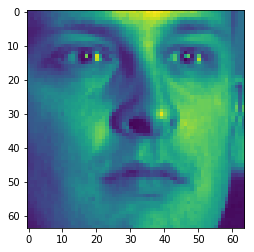

In [4]:
implot = plt.imshow(train_data[10000])

In [5]:
# set parameters for the L-M Bank filters
# support
sup=49 #resolution

# create a matrix [49,49,48] representing the fitlers. 
print('creating filter bank...')
F = makeLMfilters(sup)

creating filter bank...


In [6]:
F.shape

(49, 49, 48)

In [7]:
F[:,:,0]

array([[ 1.03689080e-70,  3.82585579e-70,  1.33535488e-69, ...,
         1.33535488e-69,  3.82585579e-70,  1.03689080e-70],
       [ 1.25953366e-65,  4.64734970e-65,  1.62208443e-64, ...,
         1.62208443e-64,  4.64734970e-65,  1.25953366e-65],
       [ 9.26227232e-61,  3.41753617e-60,  1.19283733e-59, ...,
         1.19283733e-59,  3.41753617e-60,  9.26227232e-61],
       ...,
       [-9.26227232e-61, -3.41753617e-60, -1.19283733e-59, ...,
        -1.19283733e-59, -3.41753617e-60, -9.26227232e-61],
       [-1.25953366e-65, -4.64734970e-65, -1.62208443e-64, ...,
        -1.62208443e-64, -4.64734970e-65, -1.25953366e-65],
       [-1.03689080e-70, -3.82585579e-70, -1.33535488e-69, ...,
        -1.33535488e-69, -3.82585579e-70, -1.03689080e-70]])

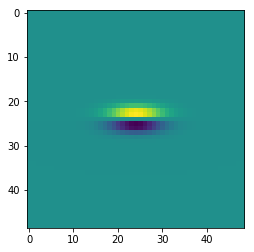

In [8]:
#Looking at one of the filter
plt.imshow(F[:,:,0])

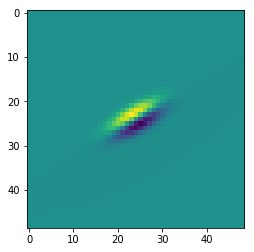

In [9]:
plt.imshow(F[:,:,1])

C:\Users\asiaynrf\AppData\Local\Continuum\anaconda3\envs\tensorflowpy36\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


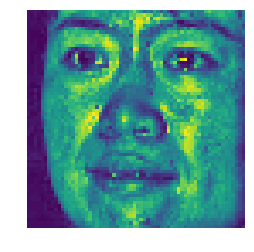

In [10]:
# Adjust the contrast of the images by applyting Histogram Equalization
from skimage import exposure
img=train_data[9]
image_equalized = exposure.equalize_adapthist(img/np.max(np.abs(img)), clip_limit=0.03)
plt.imshow(image_equalized)
plt.axis('off')
plt.show()

[[32 45 40 ... 46 41 47]
 [29 44 30 ... 45 40 51]
 [14 40 46 ... 44 43 48]
 ...
 [10 11 11 ... 62 60 65]
 [15 17 16 ... 66 64 68]
 [19 21 23 ... 78 66 68]]


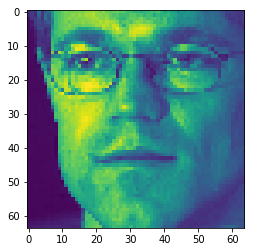

In [11]:
# Converting the image to a grayscale
from skimage import io, color
img=train_data[200]
print(img)
img=color.rgb2gray(img)
plt.imshow(img)

In [ ]:
# As 64x64 size image to convolve with 49x49, there is a padding required of 24x24
def convolve2d_test_pad(image, filter_):
    '''
    input args:
        image: a numpy array of size [image height, image width]
        filter_: a numpy array of filter size [filter hieght, filter width] [49, 49]
    output: convolved output
    '''
    output=np.zeros(image.shape)
    filter_ = np.flipud(np.fliplr(filter_))    # Flip the kernel
    shift=len(filter_[0])-1
    # Adding zero padding for the input image
    image_padded = np.zeros((image.shape[0]+shift, image.shape[1]+shift))
    image_padded[int(shift/2):-int(shift/2), int(shift/2):-int(shift/2)] =image
    
    #Looping over every pixel
    for col in range(image.shape[1]):
        for row in range(image.shape[0]):
            output[col][row]=(np.sum(np.multiply(image_padded[col:col+len(filter_[0]), row:row+len(filter_[0])], filter_)))
    return output

In [ ]:
# Let's check the convolution now
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
image_convolve_test=convolve2d_test_pad(train_data[200], F[:,:,0])
print("shape of the Convolved image",image_convolve_test.shape)
#print(image_convolve_test)
plt.imshow(image_convolve_test)
plt.axis('off')
plt.show()
#image_convolve_test=convolve2d_test(train_data[200], kernel)

In [ ]:
import scipy
img_new=scipy.signal.convolve2d(train_data[200], F[:,:,0], 'same')
print(img_new)
plt.imshow(img_new)
plt.axis('off')
plt.show()

### Lets use the fea_util.py Now to calculate the Vector of Filter responses
+ Get the final vector

In [12]:
print('extracting filter responses')
train_filter_feature, test_filter_feature = get_filter_feature(train_data[0:100], test_data[0:100], F)

extracting filter responses


In [13]:
print('extracting filter responses')
import time
start = time.time()
train_filter_feature1, test_filter_feature1 = get_filter_feature(train_data[101:200], test_data[101:200], F)
train_filter_feature2, test_filter_feature2 = get_filter_feature(train_data[201:300], test_data[201:300], F)
train_filter_feature3, test_filter_feature3 = get_filter_feature(train_data[301:400], test_data[301:400], F)
train_filter_feature4, test_filter_feature4 = get_filter_feature(train_data[401:500], test_data[401:500], F)
train_filter_feature5, test_filter_feature5 = get_filter_feature(train_data[501:600], test_data[501:600], F)
stop = time.time()

extracting filter responses


In [16]:
start = time.time()
train_filter_feature6, test_filter_feature6 = get_filter_feature(train_data[600:3000], test_data[600:], F)
stop = time.time()

In [17]:
print(stop-start)

11229.62919473648


In [18]:
start = time.time()
train_filter_feature7, test_filter_feature7 = get_filter_feature(train_data[3000:4000], [], F)
stop = time.time()
print(stop-start)

3653.309433221817


In [24]:
start = time.time()
train_filter_feature8, test_filter_feature8 = get_filter_feature(train_data[4000:10000], [], F)
train_filter_feature9, test_filter_feature9 = get_filter_feature(train_data[10000:], [], F)
stop = time.time()
print(stop-start)

22759.224316835403


In [25]:
train_filter_feature_fin = train_filter_feature+train_filter_feature1+train_filter_feature2+train_filter_feature3+\
train_filter_feature4+train_filter_feature5+train_filter_feature6+train_filter_feature7+train_filter_feature8+\
train_filter_feature9

test_filter_feature_fin = test_filter_feature+test_filter_feature1+test_filter_feature2+test_filter_feature3+test_filter_feature4+\
test_filter_feature5+test_filter_feature6

In [44]:
print(len(train_filter_feature_fin), len(test_filter_feature_fin))
print(len(train_filter_feature_fin[0]), len(test_filter_feature_fin[0]))

10257 1287
48 48


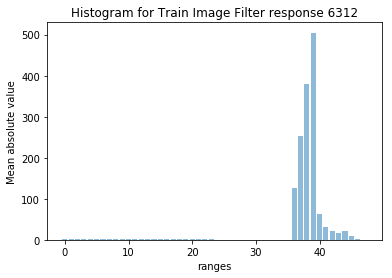

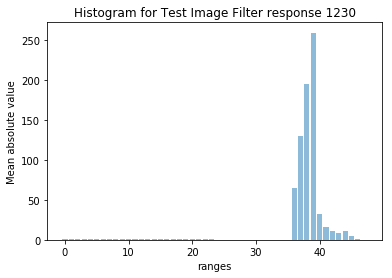

In [31]:
ranges=[i for i in range(48)]
import random
idx1=np.random.randint(len(train_filter_feature_fin))
plt.bar(ranges, train_filter_feature_fin[idx1], align='center', alpha=0.5)
plt.ylabel('Mean absolute value')
plt.xlabel('ranges')
plt.title('Histogram for Train Image Filter response {}'.format(idx1))
plt.show()

idx2=np.random.randint(len(test_filter_feature_fin))
ranges=[i for i in range(48)]
plt.bar(ranges, test_filter_feature_fin[idx2], align='center', alpha=0.5)
plt.ylabel('Mean absolute value')
plt.xlabel('ranges')
plt.title('Histogram for Test Image Filter response {}'.format(idx2))
plt.show()

In [43]:
print(train_filter_feature_new.shape)

(10257, 48)


In [45]:
print(test_filter_feature_new.shape)

(1287, 48)


In [42]:
train_filter_feature_new=train_filter_feature_new.reshape(10257,-1)

In [46]:
test_filter_feature_new = test_filter_feature_new.reshape(1287, -1)

In [52]:
print('training classifiers')
# create a classifier using sklearn.svm
from sklearn import svm
clf1=svm.SVC(kernel='linear')
# training
clf1.fit(train_filter_feature_new, train_label[:-5])

training classifiers


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
print(train_filter_feature_new)
print("######################")
print(test_filter_feature_new)

[[0.94143853 0.91014548 0.89448412 ... 4.08140096 1.29640081 0.29383615]
 [1.04869619 0.9858786  0.96575852 ... 4.34914124 1.38144482 0.30977899]
 [0.99466764 0.9172521  0.901426   ... 4.04885026 1.28606153 0.28548568]
 ...
 [2.72280941 2.40804037 2.20604036 ... 9.78966375 3.10955187 0.67879299]
 [2.02354819 1.84033826 1.85208088 ... 7.17566965 2.27925264 0.52838603]
 [1.11930988 1.10742704 1.21131655 ... 4.31090503 1.37118626 0.34392125]]
######################
[[1.57615511 1.71576625 1.87158788 ... 7.69854225 2.44533592 0.55754375]
 [1.06362923 1.26642582 1.61268681 ... 4.70179543 1.49934779 0.39555454]
 [1.89869187 1.95680289 2.17318209 ... 8.88147777 2.82216655 0.63615942]
 ...
 [1.44678575 1.52211009 1.70888788 ... 6.17590773 1.96169204 0.44499979]
 [1.31779381 1.34707149 1.47058089 ... 5.27598962 1.67616439 0.40572007]
 [1.49434678 1.5019976  1.59352443 ... 6.16913718 1.95954147 0.42710357]]


In [54]:
# calculate score
print('Accuracy = ', round(clf1.score(test_filter_feature_new, test_label[:-5]), 4))

#testing
predict_y = clf1.predict(test_filter_feature_new)
#report 
print(metrics.classification_report(test_label[:-5],predict_y))

Accuracy =  0.1033
             precision    recall  f1-score   support

          1       0.05      0.05      0.05        19
          2       0.04      0.16      0.07        19
          3       0.13      0.21      0.16        19
          4       0.23      0.16      0.19        19
          5       0.00      0.00      0.00        19
          6       0.04      0.11      0.05        19
          7       0.03      0.05      0.04        19
          8       0.18      0.21      0.20        19
          9       0.05      0.05      0.05        19
         10       0.22      0.26      0.24        19
         11       0.10      0.16      0.12        19
         12       0.03      0.16      0.05        19
         13       0.25      0.11      0.15        19
         14       0.06      0.05      0.06        19
         15       0.38      0.32      0.34        19
         16       0.27      0.16      0.20        19
         17       0.36      0.26      0.30        19
         18       0.00    

In [55]:
print(predict_y)

[31  1  9 ... 18  7 13]


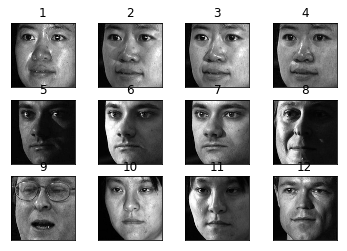

In [57]:
# save the misclassification information
fea = []
filter_fea = []
ans = []
pre_ans = []
predict_y = clf1.predict(test_filter_feature_new)
for i in range(len(predict_y)):
    if predict_y[i] != test_label[i]:
        fea.append(test_data[i])
        filter_fea.append(test_filter_feature_new[i])
        ans.append(test_label[i])
        pre_ans.append(predict_y[i])

sio.savemat('wrongClassification', {
    'features': fea,
    'filterFeatures': filter_fea,
    'label': ans,
    'predictLabel': pre_ans
})

# show misclassification picture
#for i in range(len(fea)):
for i in range(np.amin([12,len(fea)])):
    plt.subplot(3,4,i+1)
    plt.imshow(fea[i],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(i+1)
plt.show()

## Results
+ The accuracy here is higher than what was got for the Problem 1 using histogram of colors, the first attempt comes about 10.3%, which is very low, and needs improvements